#PART-III TWO LAYER MLP WITH PIMA Diabetes Dataset


In [ ]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

In [ ]:
pima_df = pd.read_csv("/content/pima_diabetes.csv")

In [ ]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   6       767 non-null    int64  
 1   148     767 non-null    int64  
 2   72      767 non-null    int64  
 3   35      767 non-null    int64  
 4   0       767 non-null    int64  
 5   33.6    767 non-null    float64
 6   0.627   767 non-null    float64
 7   50      767 non-null    int64  
 8   1       767 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
pima_df.head()

,6,148,72,35,0,33.6,0.627,50,1
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


In [ ]:
pima_df = pd.read_csv("/content/pima_diabetes.csv", header=None)

# Assign column names to the DataFrame
pima_df.columns = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']




In [ ]:
print(pima_df.head())

   preg  plas  pres  skin  test  mass   pedi  age  class
0     6   148    72    35     0  33.6  0.627   50      1
1     1    85    66    29     0  26.6  0.351   31      0
2     8   183    64     0     0  23.3  0.672   32      1
3     1    89    66    23    94  28.1  0.167   21      0
4     0   137    40    35   168  43.1  2.288   33      1


In [ ]:

pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


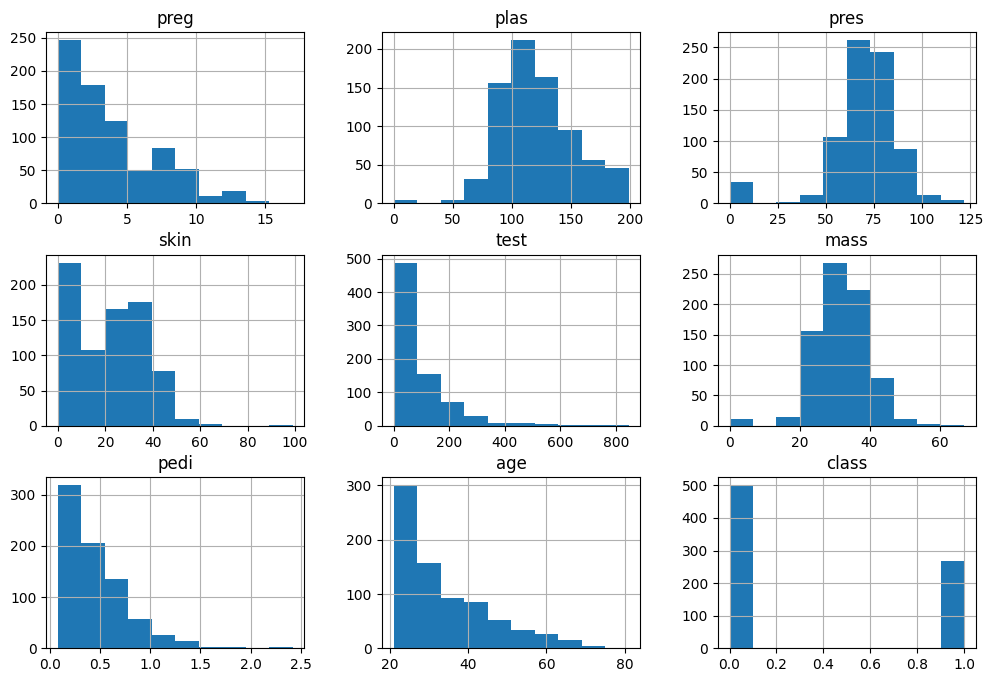

In [ ]:
pima_df.hist(figsize = (12,8))
pyplot.show()

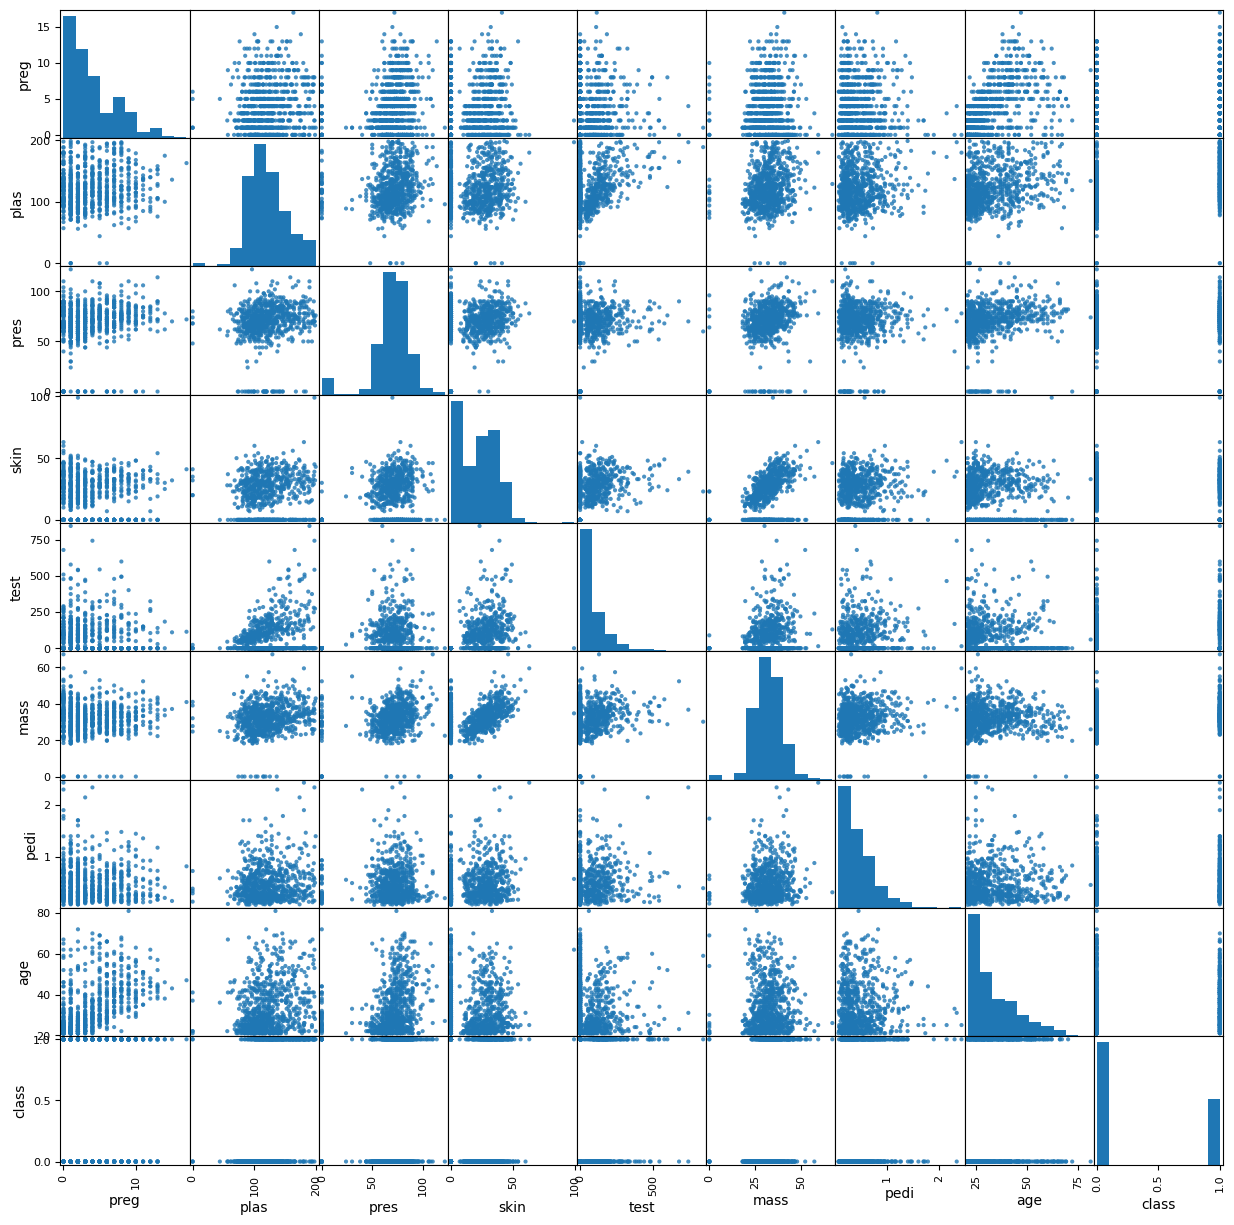

In [ ]:
#scatter_plot of the given pima diabetes dataset
scatter_matrix(pima_df, alpha=0.8, figsize=(15,15))
pyplot.show()

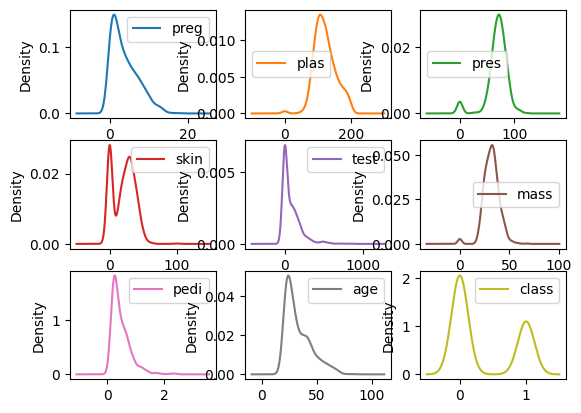

In [ ]:
#density plot
pima_df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, legend=True)
pyplot.show()

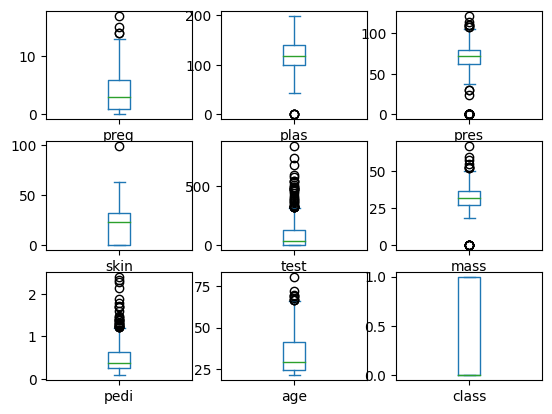

In [ ]:
#box chart
pima_df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, legend=True)
pyplot.show()

In [ ]:
print(pima_df.isnull().sum())

preg     0
plas     0
pres     0
skin     0
test     0
mass     0
pedi     0
age      0
class    0
dtype: int64


In [ ]:
print(pima_df.shape)

(768, 9)


In [ ]:
#
arr1 = pima_df.values
X = arr1[:,0:8]
Y = arr1[:,8]
test_size = 0.2
#training and testing split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)

In [ ]:
def baseline_model():
    model = Sequential()
    model.add(Dense(32, input_dim=8, activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()

model.fit(X_train, Y_train, epochs=150, batch_size=10)

Epoch 1/150
62/62 [==============================] - 2s 2ms/step - loss: 2.6453 - accuracy: 0.5879
Epoch 2/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8210 - accuracy: 0.6173
Epoch 3/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8066 - accuracy: 0.6270
Epoch 4/150
62/62 [==============================] - 0s 2ms/step - loss: 0.8130 - accuracy: 0.6140
Epoch 5/150
62/62 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.6368
Epoch 6/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7393 - accuracy: 0.6205
Epoch 7/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.6743
Epoch 8/150
62/62 [==============================] - 0s 3ms/step - loss: 0.7256 - accuracy: 0.6336
Epoch 9/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6931 - accuracy: 0.6645
Epoch 10/150
62/62 [==============================] - 0s 3ms/step - loss: 0.6340 - accuracy: 0.6694
Epoch 11/

In [ ]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

_, accuracy = model.evaluate(X_train, Y_train)
print('accuracy_training: %.2f' % (accuracy*100))

scores = model.evaluate(X_test, Y_test)
# Print the model's accuracy on the test set
print("\n %s_evaluation: %.2f%%" % (model.metrics_names[1], scores[1]*100))

20/20 [==============================] - 1s 2ms/step - loss: 0.4285 - accuracy: 0.7915
accuracy_training: 79.15
5/5 [==============================] - 0s 3ms/step - loss: 0.6754 - accuracy: 0.6948

 accuracy_evaluation: 69.48%


In [ ]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from keras.wrappers.scikit_learn import KerasClassifier

# Standardize the data
scaler = StandardScaler().fit(X)
X = scaler.transform(X)

# Create the model
model = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=10, verbose=0)

# Evaluate using 10-fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
results = cross_val_score(model, X, Y, cv=kfold)
print("accuracy_evaluation: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))



<ipython-input-20-11deae47956f>:10: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=baseline_model, epochs=150, batch_size=10, verbose=0)


accuracy_evaluation: 72.26% (4.68%)
